# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

training_file = './data/train.p'
testing_file =  './data/test.p'
class_desc_file = './data/signnames.csv'
train_classes = dict ()

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)  

# Read CSV file and show sign description
with open (class_desc_file, newline='') as csvFile:
    csvReader = csv.DictReader(csvFile)  # reads first line as Column names
    
    for row in csvReader:
        train_classes[int(row['ClassId'])] = row['SignName']
        
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape   # (32, 32, 3)

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train)) 

assert(len(train_classes) == len(set(y_train))) 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

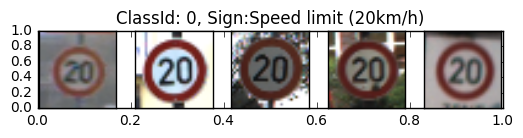

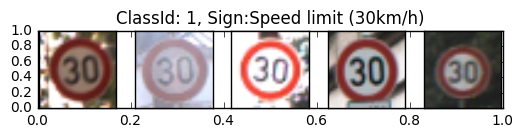

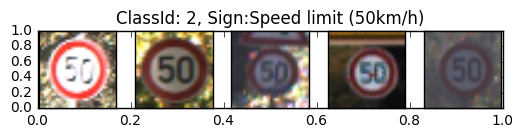

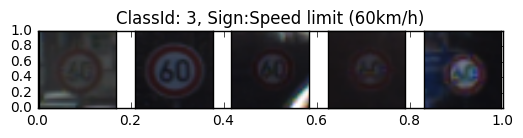

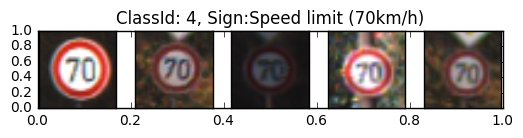

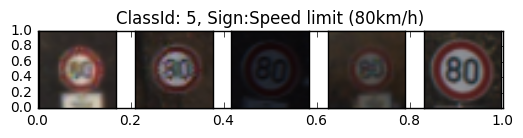

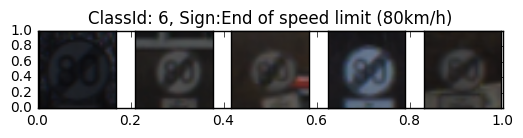

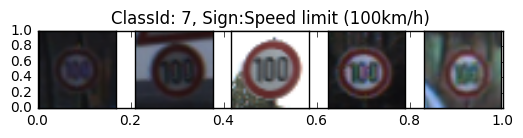

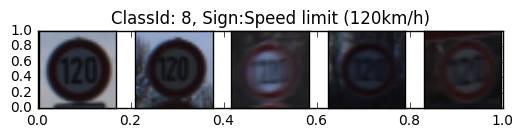

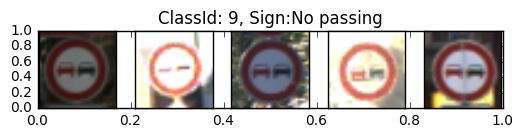

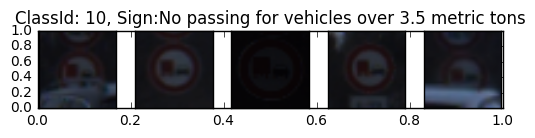

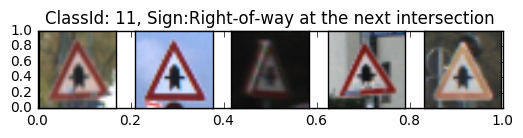

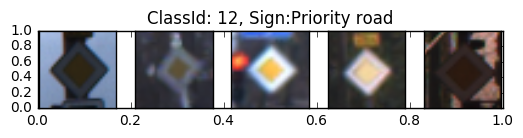

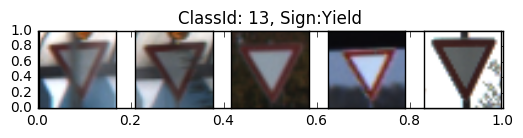

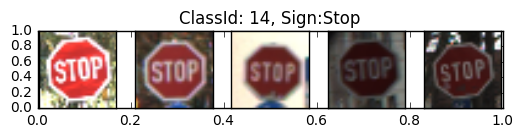

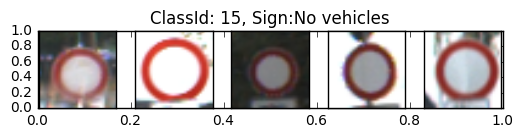

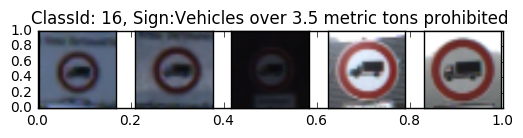

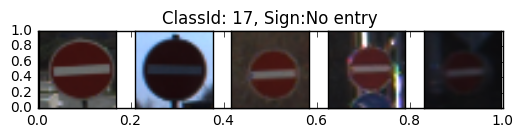

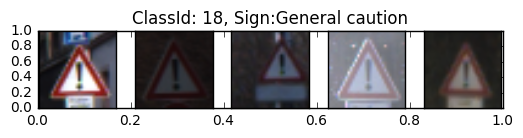

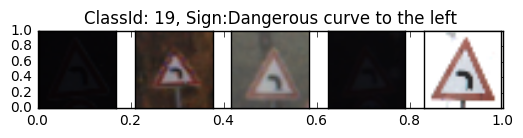

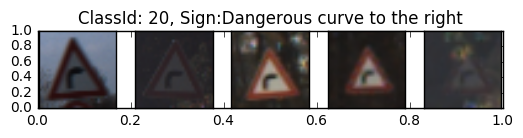

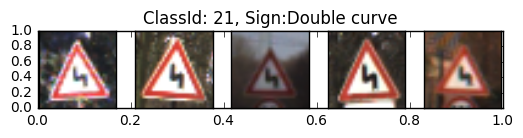

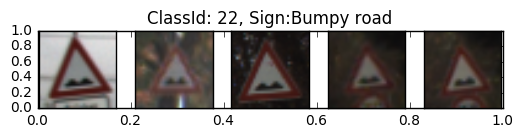

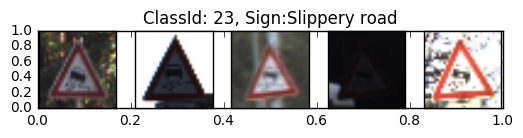

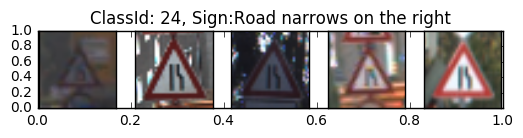

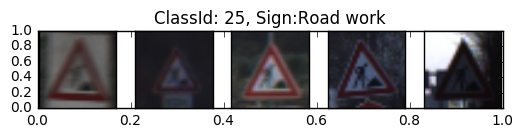

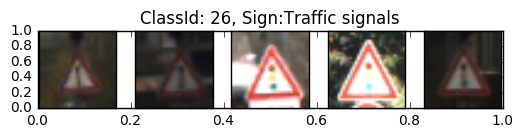

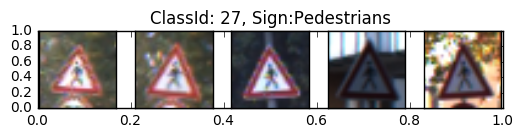

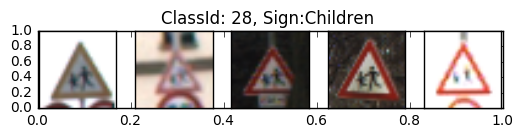

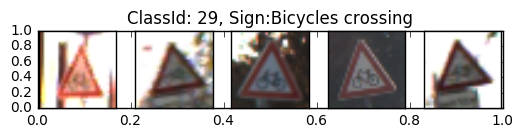

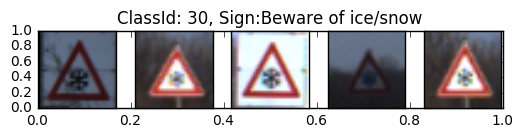

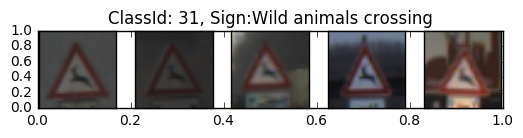

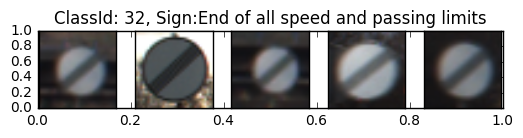

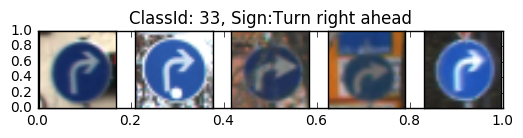

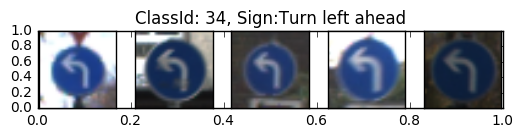

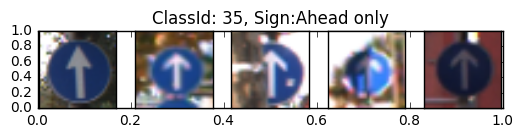

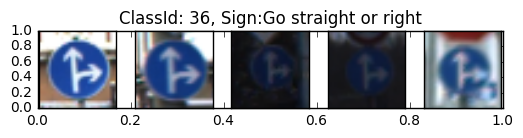

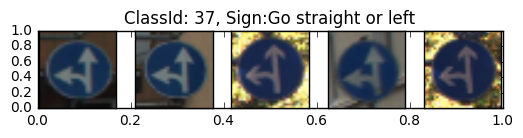

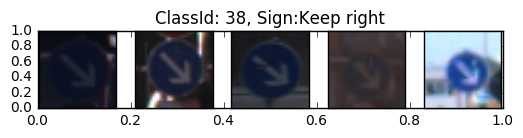

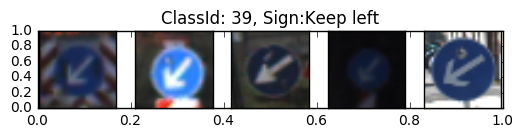

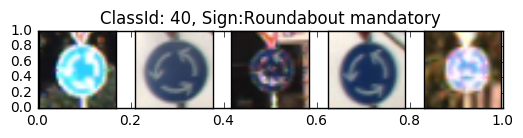

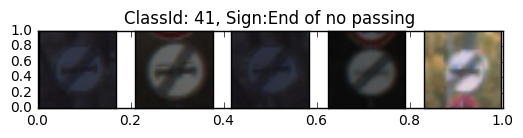

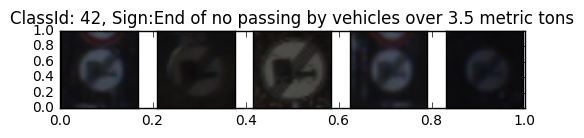

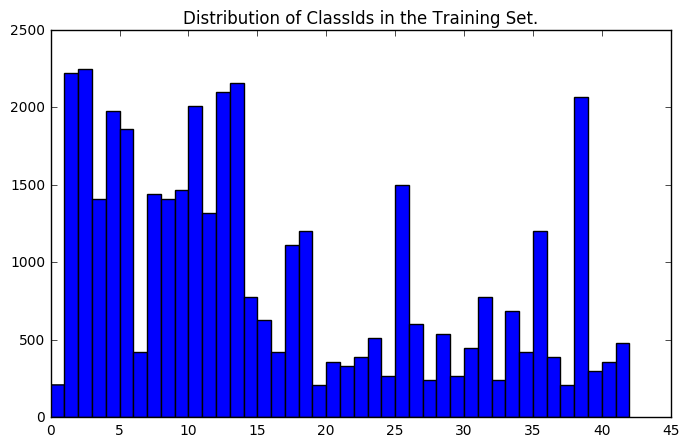

ClassId: Class Name  = Count 
0: Speed limit (20km/h)  = 210 
1: Speed limit (30km/h)  = 2220 
2: Speed limit (50km/h)  = 2250 
3: Speed limit (60km/h)  = 1410 
4: Speed limit (70km/h)  = 1980 
5: Speed limit (80km/h)  = 1860 
6: End of speed limit (80km/h)  = 420 
7: Speed limit (100km/h)  = 1440 
8: Speed limit (120km/h)  = 1410 
9: No passing  = 1470 
10: No passing for vehicles over 3.5 metric tons  = 2010 
11: Right-of-way at the next intersection  = 1320 
12: Priority road  = 2100 
13: Yield  = 2160 
14: Stop  = 780 
15: No vehicles  = 630 
16: Vehicles over 3.5 metric tons prohibited  = 420 
17: No entry  = 1110 
18: General caution  = 1200 
19: Dangerous curve to the left  = 210 
20: Dangerous curve to the right  = 360 
21: Double curve  = 330 
22: Bumpy road  = 390 
23: Slippery road  = 510 
24: Road narrows on the right  = 270 
25: Road work  = 1500 
26: Traffic signals  = 600 
27: Pedestrians  = 240 
28: Children   = 540 
29: Bicycles crossing  = 270 
30: Beware of ice/snow 

In [3]:
%matplotlib inline

def visualize(X_train, y_train, train_classes):
    """
    - Displays 5 samples for each Sign class.
    - Displays distribution of classIds in Training set.
    - List Class Id, Name and counts.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import random

    sign_classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)

    for cls, index, count in zip(sign_classes, class_indices, class_counts):
        fig = plt.figure(figsize = (6, 1))
        plt.title("ClassId: {}, Sign:{}".format(cls, train_classes[int(cls)]))
        random_indices = random.sample(range(index, index + count), 5)
        for i in range(5):
            axis = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
            axis.imshow(X_train[random_indices[i]])
        plt.show()
        
    from collections import Counter
    cc = Counter(y_train)
    
    plt.figure(figsize=(8, 5))
    plt.hist(y_train, range(0, len(train_classes), 1) )
    plt.title("Distribution of ClassIds in the Training Set.")
    plt.show()
    
    print ("ClassId: Class Name  = Count ")
    for k in cc:
        print ("{}: {}  = {} ".format(k, train_classes[int(k)], cc[k]))    


visualize(X_train, y_train, train_classes)



### Data Exploration

Training set distribution shows samples are not distrubuted uniformly acrosss all classes of Traffic Signs. Top 14 classes have more than 1k samples with many more than 1.5k samples. While bottom half, around 22 classes have less than 500 samples, many just one to two hundreds. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

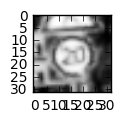

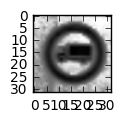

In [4]:
%matplotlib inline

# Pre-processing 

# Gray scale the images
def grayScale(image):
    """
    Convert Color/RGB (3 dimension) image to gray scale (1 dimension) image.
    Returns: grayscale image
    """
    import cv2
    # print ("Image Shape:", image.shape)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = cv2.equalizeHist(gray.squeeze())
    return  gray

# Pre-process the data
def pre_process(Xt):
    """
    - Convert each image in the Xt to gray scale image.
    - Display a sample gray image
    - Normalize Train and Test set images dimensions to zero mean and unit standard deviation. 
    
    Returns: pre-processed images
    """

    # Gray scale the color image
    import numpy as np

    xt1 = np.zeros((Xt.shape[0], Xt.shape[1], Xt.shape[2], 1), dtype=np.uint8)
    
    for i in range(len(Xt)):
        # print ("###Img shape:", X_train[i].shape)
        xt1[i] = grayScale(Xt[i]).reshape(32, 32, 1)

    Xt = xt1

    import matplotlib.pyplot as plt

    gray = Xt[0].squeeze()

    plt.figure(figsize=(1, 1))
    plt.imshow(gray, cmap='gray')
    # plt.show()

    # Normalize data
    import numpy as np

    Xt = (Xt - np.mean(Xt, axis=0)) / np.std(Xt, axis=0)
    
    return Xt

# Convert each image in the Training and Test set to gray scale image.
X_train = pre_process(X_train)    
X_test = pre_process(X_test)

# Shuffle, Split Input training data into training and validation set of 4:1 ratio
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Training and Test sample images are converted to Gray scale. Then Training samples are shuffled so as to make sure samples are not in order, which is counter productive for model training. Like samples of same classes are clustered together. 

Both Training and Test data sets are then normalized using [mean substraction and feature standardization](http://ufldl.stanford.edu/wiki/index.php/Data_Preprocessing)[1].Mean substraction for image data removes average brightnes, as brightness or lighting conditions of the images are not relevant for our purposes. Feature standardization makes each of dimensions data to have zero mean and unit-variance. This will reduce negative effect of widely varying data range on our objective function.

I have also tried converting color images to gray scale images, but the validation percentage did not improve as shown in the [paper by LeCun](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)[2].

[1] http://ufldl.stanford.edu/wiki/index.php/Data_Preprocessing

[2] http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

In [5]:

def split_training_validation(xt, yt, ratio):
    """
    Split original Test set into actual traing set and validation set.
    Returns: new X_train, y_train, X_validation and y_validation
    """
    from sklearn.model_selection import train_test_split

    # X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=5, stratify=y_train)
    xt, xv, yt, yv = train_test_split(xt, yt, test_size=ratio, random_state=5)
    
    return xt, xv, yt, yv
    

# Split input training data into training and validation set of 4 to 1 ratio
X_train, X_validation, y_train, y_validation = split_training_validation(X_train, y_train, 0.2)

print()
print("New Training Set:   {} samples".format(len(X_train)))
print("New Validation Set: {} samples".format(len(X_validation)))
print("Test Set:           {} samples".format(len(X_test)))


New Training Set:   31367 samples
New Validation Set: 7842 samples
Test Set:           12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Sklearn module's train_test_split function is used to split 20% of the original training set data into validation set. Before splitting Training samples into Training and Validation set, original Training set samples are shuffled so as to make sure samples are not in order.


### Tensorflow LeNet Model

In [6]:
# Setup TensorFlow pipeline
import tensorflow as tf
"""
Use below tuned/optimized hyper parameter with modified LeNet5 model to build TF pipeline.

"""

EPOCHS = 30 #50
BATCH_SIZE = 32
KEEP_PROB = 0.70
L2_REGUL = 0.001
LEARN_RATE = 0.0003

INPUT_DEPTH = 1 # 3
NUM_CLASSES = 43

# LeNet 5
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)  # probability to keep units

l2reg = None


def LeNet(x):
    """
    Use LeNet model as base, then modified/tuned finally as below.
                  Input     Conv stride  CNN Output  Activation                 Output
    Layer C1      32x32x1   5x5  1x1     28x28x32    ReLU + Dropout + MaxPool   14x14x32
    Layer C2      14x14x32  5x5  1x1     10x10x64    ReLU + Dropout + MaxPool   5x5x64
    Layer FC3     5x5x64=1600                        ReLU + Dropout             256
    Layer FC4     256                                ReLU + Dropout             128
    Layer FC5     128                                                           43 
    
    Loss function: L2Reg
    
    Returns: logits
    
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    L1_DEPTH = 32 # 6
    L2_DEPTH = 64 #16
    FC2_DEPTH = 1600 # 400
    FC3_DEPTH = 256  # 120
    FC4_DEPTH = 128  # 84

    # Layer C1: Convolutional. Input = 32x32xINPUT_DEPTH. Output = 28x28xL1_DEPTH.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, INPUT_DEPTH, L1_DEPTH), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(L1_DEPTH))
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, conv1_W, [1, 1, 1, 1], 'VALID'), conv1_b)

    # C1 Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # C1 Pooling. Input = 28x28xL1_DEPTH. Output = 14x14xL1_DEPTH.
    c1p = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer C2: Convolutional. Output = 10x10xL2_DEPTH.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, L1_DEPTH, L2_DEPTH), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(L2_DEPTH))
    conv2 = tf.nn.bias_add(tf.nn.conv2d(c1p, conv2_W, [1, 1, 1, 1], 'VALID'), conv2_b)

    # C2 Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # C2 Pooling. Input = 10x10x16. Output = 5x5xL2_DEPTH.
    c2p = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5xL2_DEPTH. Output = 1600.
    fc0 = flatten(c2p)

    # Layer FC3: Fully Connected. Input = 1600. Output = 256.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(FC2_DEPTH, FC3_DEPTH), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(FC3_DEPTH))
    # fc3   = tf.matmul(fc0, fc3_W) + fc3_b  # seem to work
    fc3 = tf.nn.bias_add(tf.matmul(fc0, fc3_W), fc3_b)

    # FC3 Activation.
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)

    # Layer FC4: Fully Connected. Input = 256. Output = 128.
    fc4_W = tf.Variable(tf.truncated_normal(shape=(FC3_DEPTH, FC4_DEPTH), mean=mu, stddev=sigma))
    fc4_b = tf.Variable(tf.zeros(FC4_DEPTH))
    fc4 = tf.nn.bias_add(tf.matmul(fc3, fc4_W), fc4_b)

    # FC4 Activation.
    fc4 = tf.nn.relu(fc4)
    fc4 = tf.nn.dropout(fc4, keep_prob)

    # Layer FC5: Fully Connected. Input = 128. Output = NUM_CLASSES.
    fc5_W = tf.Variable(tf.truncated_normal(shape=(FC4_DEPTH, NUM_CLASSES), mean=mu, stddev=sigma))
    fc5_b = tf.Variable(tf.zeros(NUM_CLASSES))
    logits = tf.nn.bias_add(tf.matmul(fc4, fc5_W), fc5_b)

    # l2reg = tf.add_n([tf.nn.l2_loss(v) for v in vars if 'bias' not in v.name]) * 0.001
    # global l2reg
    l2reg = L2_REGUL * (tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W) + tf.nn.l2_loss(fc5_W))

    return logits, l2reg


### Evaluate/Validate Model

In [7]:
# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_DEPTH))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, NUM_CLASSES)

# Training Pipeline
logits, l2reg = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + l2reg
optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

validation_accuracy = None

def evaluate(X_data, y_data):
    """
    Evaluate trained model accuracy.
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Started with LeNet model as base and then finally tuned the model as below.

|   |             Input    |Conv |Stride |CNN Output |Activation |Max Pool         |Output|
|---|---|---|---|---|---|---|
|   Layer C1|     32x32x1|  5x5| 1x1|    28x28x32|   ReLU + Dropout|2x2, 2x2|   14x14x32|
|   Layer C2|     14x14x32| 5x5| 1x1|    10x10x64|   ReLU + Dropout|2x2, 2x2|   5x5x64|
|   Layer FC3|    5x5x64=1600| |    |           |    ReLU + Dropout|    |         256|
|   Layer FC4|    256|         |    |           |    ReLU + Dropout|     |        128|
|   Layer FC5|     128|         |    |           |                  |     |       43 |
    
L2 Regularization loss function is used.

Model hyper parameters for which optimal validation occuracy got are as below.
- Number of Epochs = 30
- Batch Size = 32
- Keep Probability = 0.70
- L2 Regularization param = 0.001
- Learning rate = 0.0003

### Train The Model

In [8]:
# Training the model
# with tf.Session( config=tf.ConfigProto(log_device_placement=True) ) as sess:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})

        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './term1_P2')
    print("Model saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.752

EPOCH 2 ...
Validation Accuracy = 0.898

EPOCH 3 ...
Validation Accuracy = 0.949

EPOCH 4 ...
Validation Accuracy = 0.962

EPOCH 5 ...
Validation Accuracy = 0.971

EPOCH 6 ...
Validation Accuracy = 0.979

EPOCH 7 ...
Validation Accuracy = 0.983

EPOCH 8 ...
Validation Accuracy = 0.983

EPOCH 9 ...
Validation Accuracy = 0.986

EPOCH 10 ...
Validation Accuracy = 0.986

EPOCH 11 ...
Validation Accuracy = 0.990

EPOCH 12 ...
Validation Accuracy = 0.990

EPOCH 13 ...
Validation Accuracy = 0.992

EPOCH 14 ...
Validation Accuracy = 0.993

EPOCH 15 ...
Validation Accuracy = 0.991

EPOCH 16 ...
Validation Accuracy = 0.993

EPOCH 17 ...
Validation Accuracy = 0.992

EPOCH 18 ...
Validation Accuracy = 0.991

EPOCH 19 ...
Validation Accuracy = 0.992

EPOCH 20 ...
Validation Accuracy = 0.994

EPOCH 21 ...
Validation Accuracy = 0.994

EPOCH 22 ...
Validation Accuracy = 0.993

EPOCH 23 ...
Validation Accuracy = 0.993

EPOCH 24 ...
Validation Accura

### Test The Model

In [9]:
# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

print ("EPOCHS = {}, BATCH_SIZE = {}, RATE = {}, Validation Accuracy = {:.3f}, KeepProb = {:.3f} ".format(
    EPOCHS, BATCH_SIZE, LEARN_RATE, validation_accuracy, KEEP_PROB))


Test Accuracy = 0.954
EPOCHS = 30, BATCH_SIZE = 32, RATE = 0.0003, Validation Accuracy = 0.993, KeepProb = 0.700 


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
The custom LeNet model is trained using Multinomial Logistic Classification setup. Model applies linear functions to input to derive logits. Logits are passed to softmax_cross_entropy_with_logits function along with One-Hot encoded labels to calculate Softmax Cross Entropy. Adam optimizer is used to minimize softmax cross entropy and L2 regularization value.


```python
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + l2reg
optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

```

Model hyper parameters for which optimal validation occuracy got are as below.
- Number of Epochs = 30
- Batch Size = 32 
- Keep Probability = 0.70 ( 30% drop-out)
- L2 Regularization param = 0.001
- Learning rate = 0.0003


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with LeNet5 model as similar model by LeCun et al[1] is shown to produce good results for Traffic Sign recognition. Convolutional neural networks (CNN) are specialized neural networks for processing known, grid-like topology data such as Images and time series data. CNN fits well for traffic sign recognition from the image use-case.

To tune model hyper parameters, I took the approach of trial and error. Mostly changing one hyper parameter at a time. 

- Varied the number of Epochs from 10 to 50
- Varied the BATCH_SIZE from 8 to 512
- Varied the learning rate from 0.0001 to 0.001
- Tired Keep Prob between 50% to 70% 
- Tried both color/RGB image and CV2 grayscale, but found not significant difference. 
- Adding L2 Regularization also did not seem to improve validation accuracy but might have helped in overfitting.

Also gradually increased the depth/dimension of the Convolution layers' output to increase cross validation accuracy above 97%

[1] [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

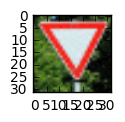

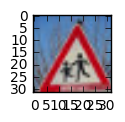

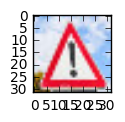

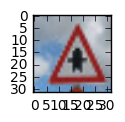

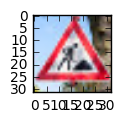

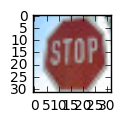

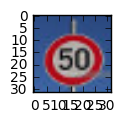

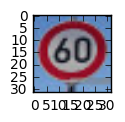

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.misc as sp

def showImageAndReturnGray(filePath):
    # image = cv2.imread(filePath)
    image = sp.imread(filePath)
    # print("Image Shape:", image.shape )
    plt.figure(figsize=(1, 1))
    plt.imshow(image)

    return grayScale(image).reshape(32, 32, 1)    
    
X_test_new = np.empty([0, 32, 32, 1], dtype = np.int32)
X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_01_yield_2.jpg")], axis = 0)
X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_02_school_2.jpg")], axis = 0)

X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_03_caution_2.jpg")], axis = 0)
X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_04_mainStRightOfWay_2.jpg")], axis = 0)
X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_05_construction_2.jpg")], axis = 0)
X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_06_stop_2.jpg")], axis = 0)
X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_07_50_2.jpg")], axis = 0)
X_test_new = np.append(X_test_new, [showImageAndReturnGray("./data/german_08_60_2.jpg")], axis = 0)


Y_test_new = np.array([
        13,  # Yeild
        28,   # School children
        18,   # Caution
        11,   # Right of way
        25,   # Construction
        14,   # stop
        2,   # 50 
        3   # 60
        ])

    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Visually downloaded web images looks clear and un-ambigous to human eye and was expecting all to be recognized by the model. Looks like images with water marks are an issue for the trained model.


In [11]:
### Run the predictions here.

def evaluateSoftMaxTopK(X_data, y_data, k):
    """
    Evaluate trained model accuracy.
    """
    num_examples = len(X_data)
    total_accuracy = 0
    
    softmax_prediction = tf.nn.softmax(logits)
    top_k_prediction =  tf.nn.top_k(softmax_prediction, k)
    
    topK = None
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        res = sess.run([accuracy_operation, top_k_prediction], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        accuracy = res[0]
        topK = res[1]
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples, topK


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))   
    new_test_accuracy, topK = evaluateSoftMaxTopK(X_test_new, Y_test_new, 5)
    print("Test Accuracy = {:.3f}".format(new_test_accuracy))
    print()
    print()
    print("TopK ", topK)
    print()
    print()

Test Accuracy = 0.750


TopK  TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.55568052e-33,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.41205242e-15,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[13,  0,  1,  2,  3],
       [35, 28,  0,  1,  2],
       [18,  0,  

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Model seemed perform as well on imgaes downloaded from the web as it did on test and cross validation set. It performed with better accuracy on the limited (8) newly downloaded, curated images. where as on test and validation set it did higher than 95%. This may be due to small set of the new test data. For large number of the new test data, accuracy might be closer to test accuracy.



Expected  Sign class 13 - Yield.
Predicted Sign class 13 - Yield.


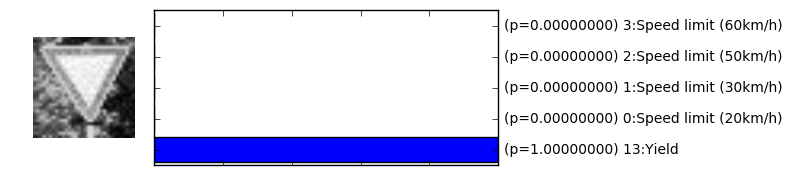



Expected  Sign class 28 - Children .
Predicted Sign class 35 - Ahead only.


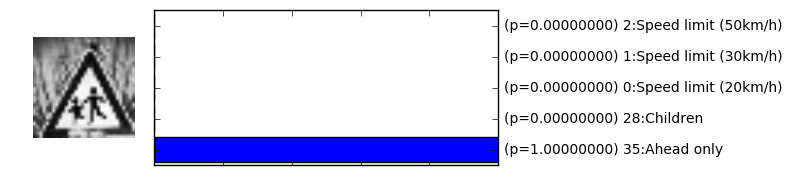



Expected  Sign class 18 - General caution.
Predicted Sign class 18 - General caution.


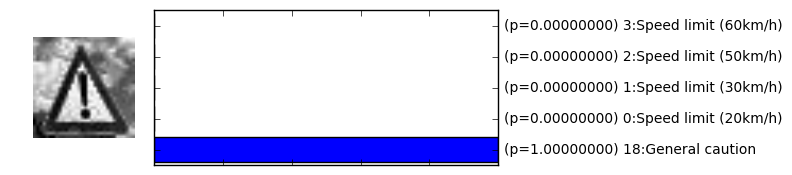



Expected  Sign class 11 - Right-of-way at the next intersection.
Predicted Sign class 11 - Right-of-way at the next intersection.


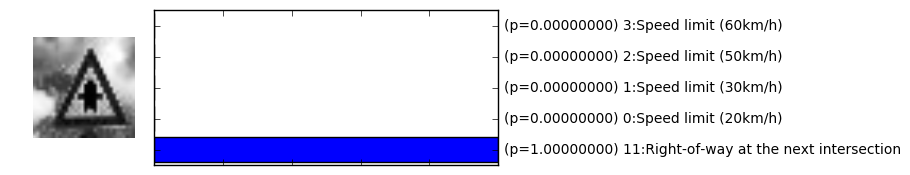



Expected  Sign class 25 - Road work.
Predicted Sign class 25 - Road work.


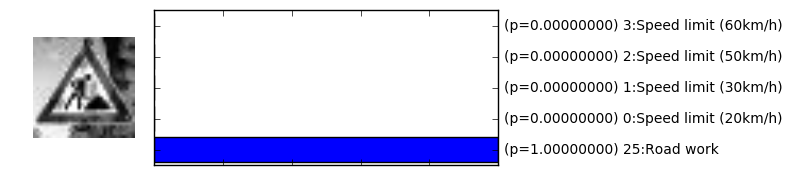



Expected  Sign class 14 - Stop.
Predicted Sign class 13 - Yield.


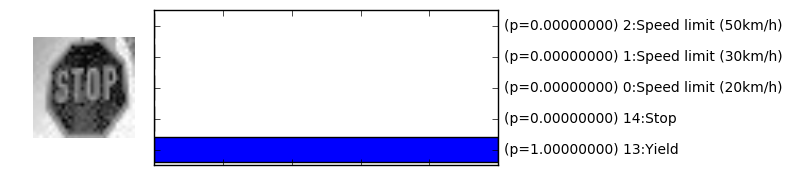



Expected  Sign class 2 - Speed limit (50km/h).
Predicted Sign class 2 - Speed limit (50km/h).


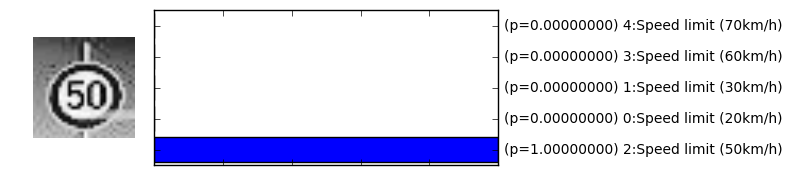



Expected  Sign class 3 - Speed limit (60km/h).
Predicted Sign class 3 - Speed limit (60km/h).


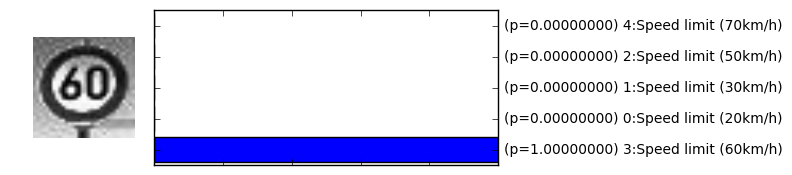

In [12]:
### Visualize the softmax probabilities here.

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

def drawTopK(image, predictedClassIds, predictedClassProbs):
    """
    """
        
    plt.figure(figsize = (6, 2))
    gridspec.GridSpec(1, 4)    

    plt.subplot2grid((1, 4), (0, 0), colspan=1, rowspan=1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot2grid((1, 4), (0, 1), colspan=3, rowspan=1)
    plt.barh(np.arange(5)+.5, predictedClassProbs, align='center')
    
    signNames = []
    # for key in predictedClassIds.astype(int):
    #    signNames.append(train_classes[key])
        
    for index, elem in enumerate(predictedClassIds.astype(int)):
        signNames.append("(p={:.8f}) {}:{}".format(predictedClassProbs[index], elem, train_classes[elem])) 

    # plt.yticks(np.arange(5)+.5, train_classes.get(tuple(predictedClassIds.astype(int))))
    plt.yticks(np.arange(5)+.5, signNames)
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    plt.show()
    

for i in range(len(X_test_new)):
    print ()
    print("Expected  Sign class {} - {}.".format(Y_test_new[i], train_classes[Y_test_new[i]]))
    print("Predicted Sign class {} - {}.".format(topK[1][i][0], train_classes[topK[1][i][0] ]))
    drawTopK(X_test_new[i], topK[1][i], topK[0][i])
    print ()
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Model seems to be certain of all the sign classes it predicted. Except one sign (28/Children), all the prediction probabilities are like one-hot predictions. Even for Sign class 28/Children probability is very high 0.99999833.

Yes, correct class predictions appear in top 5 predictions.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.